Trapizoidal Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    return np.sin(np.sqrt(100*x))

def trapintegral(lower,upper,slices):
    h=(upper-lower)/slices
    xlist=np.linspace(lower,upper,slices+1)
    trapint=0.
    for i in range(0,slices+1):
        if (i==0 or i==slices):
            trapint=trapint+fun(xlist[i])
        else:
            trapint=trapint+2*fun(xlist[i])
    return trapint*h/2


a=0.
b=1.
epsilon=10**-6
maxiter=20

I=np.zeros((1000,1000))
I[0][0]=trapintegral(a,b,1)

i=1
error=1
while(error>epsilon and i<maxiter):

    slic=2**i

    I[0][i]=trapintegral(a,b,slic)

    for k in range(1,i+1):
        j=i-k
        I[k][j]=I[k-1][j+1] + (I[k-1][j+1]-I[k-1][j])/ (4.0**(k) -1)
    error=abs(I[i][0]-I[i-1][1])
    i=i+1

N=i
fob=open('Output3b.txt','w+')
fob.write('===========================================================================================================================================;\n')
fob.write('                                                     Roberg Integration \n')
fob.write('===========================================================================================================================================;\n')
fob.write('-------------------------------------------------------------------------------------------------------------------------------------------\n')
fob.write('Number of slices->   ')
for i in range(0,N):
    fob.write('{0}                '.format(2**(i)))
fob.write('\n----------------------------------------------------------------------------------------------------------------------------------------\n')
for i in range(0,N):
    fob.write('Error= O(h^{0})   '.format(2*(i+1)))
    for j in range(0,i):
        fob.write('         ')
    for j in range(0,N-i):
        fob.write('{0}          '.format(round(I[i][j],6)))
    fob.write('\n\n\n')
fob.write('\n-----------------------------------------------------------------------------------------------------------------------------------------------')
if error<epsilon:
    fob.write('\nSolution converged with epsilon={0}'.format(epsilon))
else:
    fob.write('\nCAUTION! Solution did not converg with epsilon={0}'.format(epsilon))
fob.close()


simpson rule

In [2]:
#simpson rule
import numpy as np
import matplotlib.pyplot as plt
import math
def simpson(n):
  a=0.000001
  b=700
  z=[]
  h=(b-a)/n
  i=0
  k=a
  while(i<n):
    z.append(k)
    k=k+h
    i=i+1
  i=0
  y=[]
  while(i<n):
    l=(z[i]**3)/((math.exp(z[i]))-1)
    y.append(l)
    i=i+1
  s=y[0]+y[n-1]
  j=1
  while(j<(n-1)):
    if((j%2)==1):
      s=s+(4*y[j])
    else:
      s=s+(2*y[j])
    j=j+1
  s=s*(h/3)
  return(s)
print(simpson(1000))
file=open('Output4b.txt','w+')
file.write("for 1000 iteration, inegral= %s"%(simpson(1000)))
print(simpson(10000))
file.write("for 10000 iteration, inegral= %s"%(simpson(10000)))
file.close()


6.497941065864535
6.4939398024332


gaussian quadrature

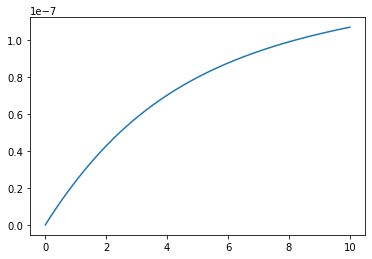

In [4]:
#double integration gaussian quadrature
import matplotlib.pyplot as plt
def f(x,y,z):
  k=6.67*(10**(-10))
  m=((x**2)+(y**2)+(z**2))**(3/2)
  return(z*k/m)
#calculating the integral
s1=0.0
ax=-5
bx=5
ay=-5
by=5
nx=100
ny=100
hx=(bx-ax)/nx
hy=(by-ay)/ny
z=0
F=[]
Z=[]
while(z<=10):
  i=ax
  while(i<=bx):
    j=ay
    while(j<=by):
      s1=s1+f(i,j,z)
      j=j+(0.2113)*hy
    i=i+(0.2113)*hx
  i=ax
  s2=0.0
  while(i<=bx):
    j=ay
    while(j<=by):
      s2=s2+f(i,j,z)
      j=j+(0.7887)*hy
    i=i+(0.7887)*hx
  s=(hx*hy/36)*(s1+s2)
  F.append(s)
  Z.append(z)
  z=z+0.1
plt.plot(Z,F)
plt.savefig("six.png")
plt.show()
